In [1]:
# Using Base modules.
using Random

# Load a plotting library.
using Plots

# Load the distributions library.
using Distributions

In [2]:
# Set the true probability of heads in a coin.
p_true = 0.5

# Iterate from having seen 0 observations to 100 observations.
Ns = 0:100;

In [3]:
# Draw data from a Bernoulli distribution, i.e. draw heads or tails.
Random.seed!(12)
data = rand(Bernoulli(p_true), last(Ns))

# Here's what the first five coin flips look like:
data[1:5]

5-element Vector{Bool}:
 1
 0
 1
 1
 0

In [4]:
# Our prior belief about the probability of heads in a coin toss.
prior_belief = Beta(1, 1);

┌ Info: Saved animation to 
│   fn = /home/igor/Área de Trabalho/FGV/13 - Iniciação Científica/Futebol/tmp.gif
└ @ Plots /home/igor/.julia/packages/Plots/Xv2qA/src/animation.jl:114


Plots.AnimatedGif("/home/igor/Área de Trabalho/FGV/13 - Iniciação Científica/Futebol/tmp.gif")
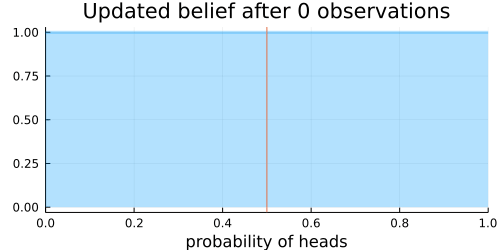

In [5]:
# Import StatsPlots for animating purposes.
using StatsPlots

# Make an animation.
animation = @gif for (i, N) in enumerate(Ns)

    # Count the number of heads and tails.
    heads = sum(data[1:i-1])
    tails = N - heads

    # Update our prior belief in closed form (this is possible because we use a conjugate prior).
    updated_belief = Beta(prior_belief.α + heads, prior_belief.β + tails)

    # Plotting
    plot(updated_belief,
        size = (500, 250),
        title = "Updated belief after $N observations",
        xlabel = "probability of heads",
        ylabel = "",
        legend = nothing,
        xlim = (0,1),
        fill=0, α=0.3, w=3)
    vline!([p_true])
end

In [6]:
# Load Turing and MCMCChains.
using Turing, MCMCChains

# Load the distributions library.
using Distributions

# Load StatsPlots for density plots.
using StatsPlots

In [7]:
@model function coinflip(y)

    # Our prior belief about the probability of heads in a coin.
    p ~ Beta(1, 1)

    # The number of observations.
    N = length(y)
    for n in 1:N
        # Heads or tails of a coin are drawn from a Bernoulli distribution.
        y[n] ~ Bernoulli(p)
    end
end;

In [8]:
# Settings of the Hamiltonian Monte Carlo (HMC) sampler.
iterations = 1000
ϵ = 0.05
τ = 10

# Start sampling.
chain = sample(coinflip(data), HMC(ϵ, τ), iterations, progress=false);

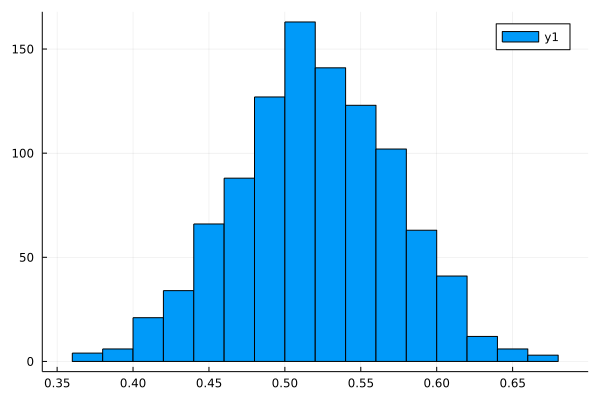

In [9]:
# Construct summary of the sampling process for the parameter p, i.e. the probability of heads in a coin.
p_summary = chain[:p]
plot(p_summary, seriestype = :histogram)

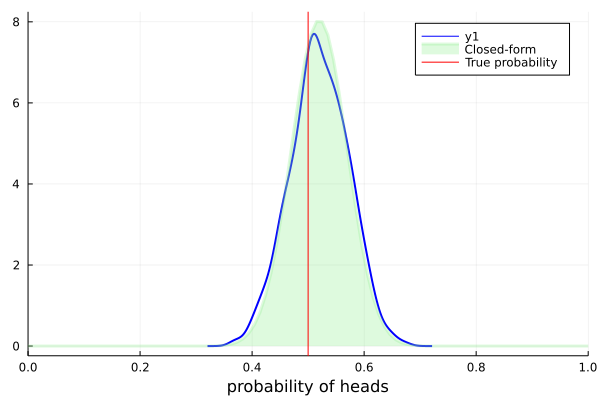

In [10]:
# Compute the posterior distribution in closed-form.
N = length(data)
heads = sum(data)
updated_belief = Beta(prior_belief.α + heads, prior_belief.β + N - heads)

# Visualize a blue density plot of the approximate posterior distribution using HMC (see Chain 1 in the legend).
p = plot(p_summary, seriestype = :density, xlim = (0,1), legend = :best, w = 2, c = :blue)

# Visualize a green density plot of posterior distribution in closed-form.
plot!(p, range(0, stop = 1, length = 100), pdf.(Ref(updated_belief), range(0, stop = 1, length = 100)),
        xlabel = "probability of heads", ylabel = "", title = "", xlim = (0,1), label = "Closed-form",
        fill=0, α=0.3, w=3, c = :lightgreen)

# Visualize the true probability of heads in red.
vline!(p, [p_true], label = "True probability", c = :red)